<h2> Import Library

In [1031]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [1032]:
! pip install mlxtend

<h2> Import Dataset

In [1033]:
url = "https://raw.githubusercontent.com/JonathanTanojo/dataminingalp/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv"
df = pd.read_csv(url)
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


<h2>Exploratory Data Analysis

In [1034]:
df.duplicated().sum()

0

In [1035]:
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

<h4>Melakukan Pengisian data yang null dengan menggunakan Median, dan Mode</h4>
<br>
<text>Saya menggunakan Median pada Time,Number of Warts,dan Induration Diameter karena jenis data yang diisikan adalah data yang bukan kategorial maka dari itu saya menggunakan mode pada Type karena jenis data type pada kategorial</text>

In [1036]:
df['Time'].fillna(df['Time'].median(),inplace= True)

In [1037]:
df['Number_of_Warts'].fillna(df['Number_of_Warts'].median(),inplace= True)

In [1038]:
df['induration_diameter'].fillna(df['induration_diameter'].median(),inplace= True)

In [1039]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])

In [1040]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

<h3>Melakukan Testing Imbalace dengan metode SMOTE 

Text(0, 0.5, 'Count')

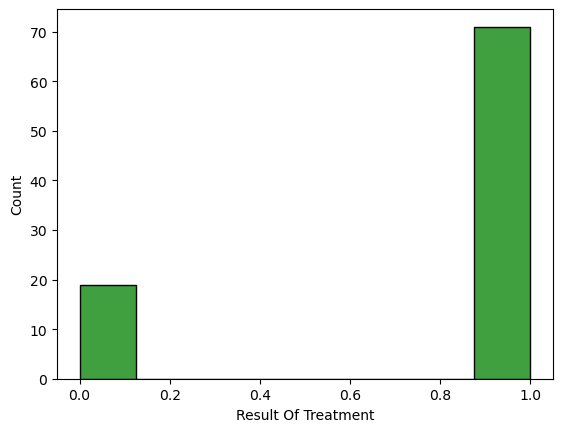

In [1041]:
sns.histplot(data=df,x='Result_of_Treatment',color="green")
plt.xlabel('Result Of Treatment', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [1042]:
x = df.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

In [1043]:
sm = SMOTE(random_state=0)
x, y = sm.fit_resample(x,y)

Text(0, 0.5, 'Count')

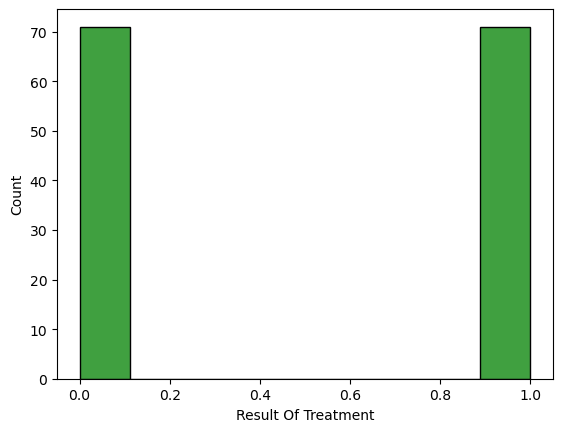

In [1044]:
sns.histplot(data=y,color="green")
plt.xlabel('Result Of Treatment', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [1045]:
df = pd.DataFrame(x)
df['Result_of_Treatment'] = y
df.columns = ["gender", "age", "time","number_of_warts","type",'area', "induration_diameter", 'treatment_result']
df

,gender,age,time,number_of_warts,type,area,induration_diameter,treatment_result
0,1,15,11.000000,6.000000,1.000000,30,25.000000,0
1,1,27,11.750000,6.000000,1.000000,208,6.000000,0
2,1,32,12.000000,9.000000,1.000000,43,50.000000,0
3,1,33,1.750000,7.000000,2.000000,379,7.000000,0
4,1,34,5.000000,7.000000,3.000000,64,7.000000,0
...,...,...,...,...,...,...,...,...
137,1,31,6.748907,6.682017,2.364034,59,7.635966,0
138,1,42,11.707131,8.142630,1.000000,89,17.129003,0
139,2,40,11.064147,10.679263,2.064147,21,5.935853,0
140,1,34,11.692472,10.617193,1.615056,88,6.000000,0


<h3>Classification

In [1046]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [1047]:
dfklasifikasi = df
Xklasifikasi = dfklasifikasi[['gender', 'age', 'number_of_warts', 'type','area', 'induration_diameter', 'time']].values
yklasifikasi = dfklasifikasi['treatment_result'].values 

In [1048]:
X_train, X_test, y_train, y_test = train_test_split(Xklasifikasi, yklasifikasi, test_size=0.1,random_state=0)

In [1049]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1050]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
x_pred = classifier.predict(X_test)
print("Hasil Prediksi :",accuracy_score(y_test,x_pred))

Hasil Prediksi : 0.6666666666666666


In [1051]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 1 0 0 0 0 1 0 0 1 1 0 0]


In [1052]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
akurasiscore_logistic = accuracy_score(y_test,y_pred)
print("Confusion Matrix\n", cm)
print("Hasil Prediksi :",accuracy_score(y_test,x_pred))

Confusion Matrix
 [[7 3]
 [2 3]]
Hasil Prediksi : 0.6666666666666666


<h3>KNN</h3>
<text> K-Nearest Neighbour

In [1053]:
knnklasifikasi = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knnklasifikasi.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [1054]:
y_pred = knnklasifikasi.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 0]


In [1055]:
cm = confusion_matrix(y_test, y_pred)
akurasiscore_knn = accuracy_score(y_test,y_pred)
print("Confusion Matrix\n", cm)
print("Hasil Prediksi :",accuracy_score(y_test,y_pred))

Confusion Matrix
 [[9 1]
 [2 3]]
Hasil Prediksi : 0.8


<h3>NAIVE BAYES

In [1056]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [1057]:
y_pred = gnb.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 0 1 1 0 0]


In [1058]:
cm = confusion_matrix(y_test, y_pred)
akurasiscore_naive = accuracy_score(y_test,y_pred) 
print("Confusion Matrix\n", cm)
print("Hasil Prediksi :",accuracy_score(y_test,y_pred))

Confusion Matrix
 [[8 2]
 [3 2]]
Hasil Prediksi : 0.6666666666666666


In [1059]:
print("Hasil Akurasi Score dari Logistic Regression =",akurasiscore_logistic)
print("Hasil Akurasi Score dari KNN =",akurasiscore_knn)
print("Hasil Akurasi Score dari Naive Bayes =",akurasiscore_naive)

Hasil Akurasi Score dari Logistic Regression = 0.6666666666666666
Hasil Akurasi Score dari KNN = 0.8
Hasil Akurasi Score dari Naive Bayes = 0.6666666666666666


Jadi Kesimpulan untuk ketiga metode klasifikasi diatas metode KNN memiliki akurasi score tertinggi

<h3>Clustering

In [1060]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch

In [1061]:
sc = StandardScaler()
dfs = sc.fit_transform(df)

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

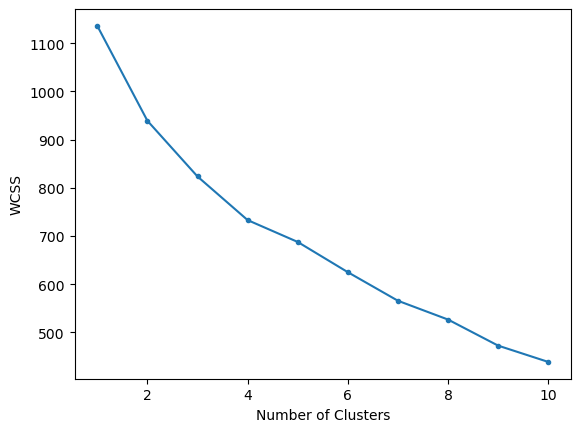

In [1062]:
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(dfs)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [1063]:
!pip install kneed

In [1064]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  4


In [1065]:
km_model = KMeans(n_clusters = 4, random_state=1)
y_kmeans = km_model.fit_predict(dfs)

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1066]:
y_kmeans

array([0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3,
       3, 1, 2, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 2,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 3, 2, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 3, 2, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

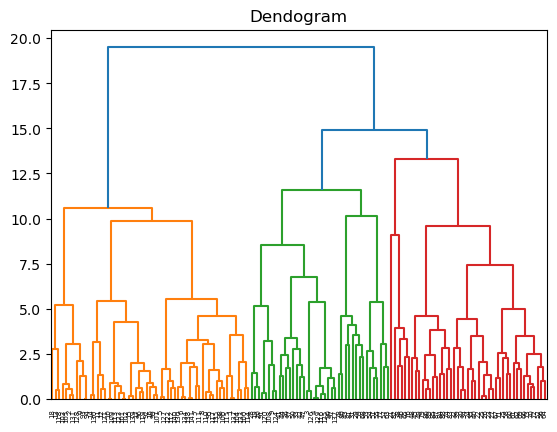

In [1067]:
dist_matrix = sch.linkage(dfs, method='ward')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<h3>Regression

In [1068]:
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import metrics

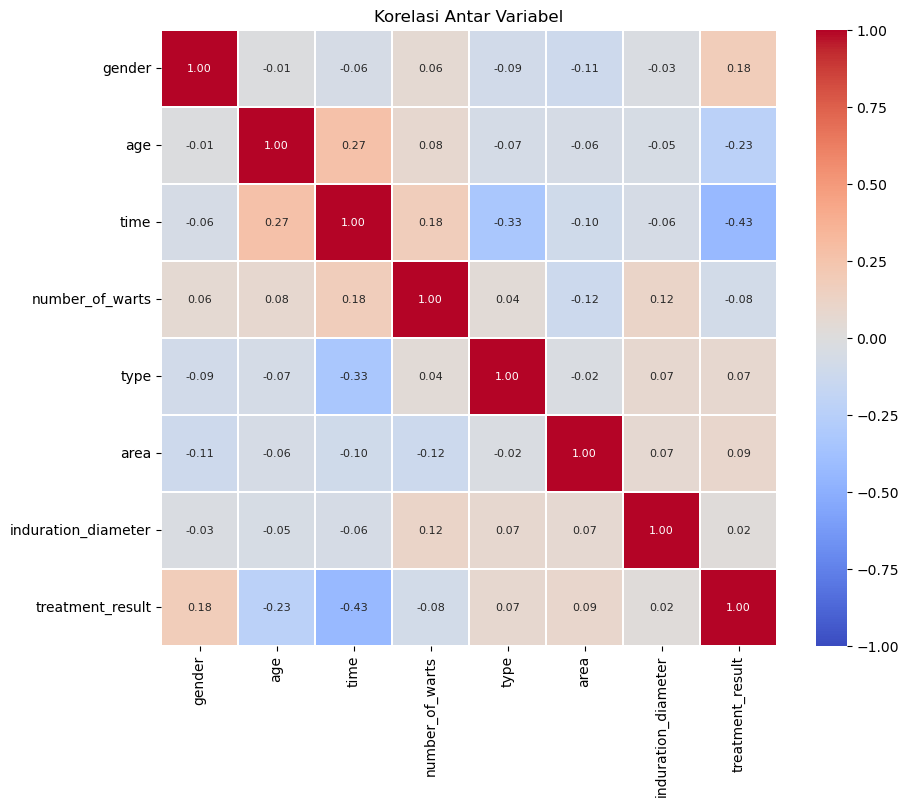

In [1069]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [1070]:
Xregresi = df[['gender', 'age', 'number_of_warts', 'type','area', 'induration_diameter', 'treatment_result']].values
yregresi = df['time'].values

In [1071]:
X_train, X_test, y_train, y_test = train_test_split(Xregresi, yregresi, test_size=0.2, random_state=0)

In [1072]:
# Model regresi linear
line = LinearRegression()
line.fit(X_train, y_train)
# Memasukkan nilai prediksi dari data-test
y_pred = line.predict(X_test)

In [1073]:
# Memasukkan nilai konstanta pada model
X = sm.add_constant(Xregresi)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(yregresi, Xregresi).fit()
print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model Score: ', line.score(np.array(X_test), y_test))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              130.9
Date:                Wed, 04 Jan 2023   Prob (F-statistic):                    5.71e-57
Time:                        23:07:54   Log-Likelihood:                         -361.54
No. Observations:                 142   AIC:                                      737.1
Df Residuals:                     135   BIC:                                      757.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1074]:
#Pada perhitungan nilai MAPE
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = line.predict(X_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  33.437529692850184
